<a href="https://colab.research.google.com/github/Pranavthimmaiah/Telecom-Churn-and-customer-retention-methods/blob/main/Pranav_Thimmaiah_Team_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/telecom_churn.csv')

In [5]:
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [6]:
df[df['State']=='KS'].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
179,KS,70,408,No,No,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.00,3,False
258,KS,92,408,Yes,No,0,62.6,111,10.64,180.6,126,15.35,221.7,80,9.98,10.4,2,2.81,1,True
287,KS,137,408,No,No,0,205.9,88,35.00,209.3,86,17.79,289.9,84,13.05,14.5,4,3.92,2,False
368,KS,132,415,No,No,0,83.4,110,14.18,232.2,137,19.74,146.7,114,6.60,7.6,5,2.05,1,False


Reason why people leave:

1)combination of area code and state code connectivity issues

 

2) due to bad customer service

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


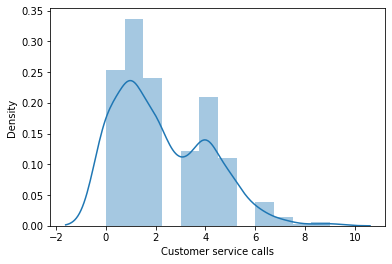

In [7]:
sns.distplot(df[df['Churn']==True]['Customer service calls'],hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


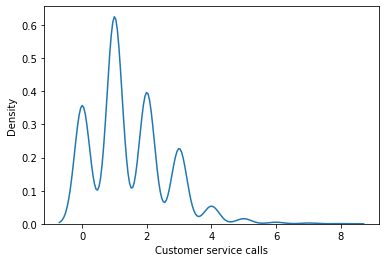

In [8]:
sns.distplot(df[df['Churn']==False]['Customer service calls'],hist=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


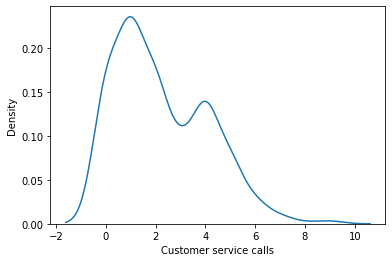

In [9]:
sns.distplot(df[df['Churn']==True]['Customer service calls'],hist=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


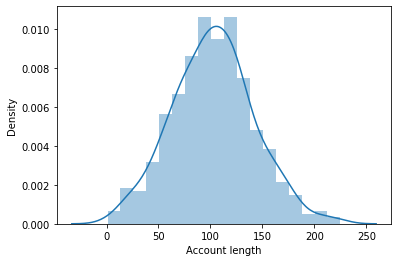

In [10]:
sns.distplot(df[df['Churn']==True]['Account length'],hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


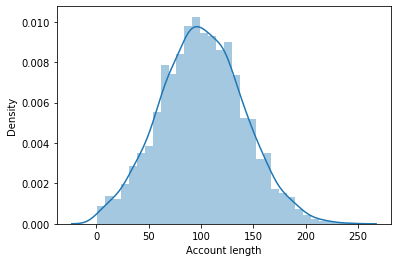

In [11]:
sns.distplot(df[df['Churn']==False]['Account length'],hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


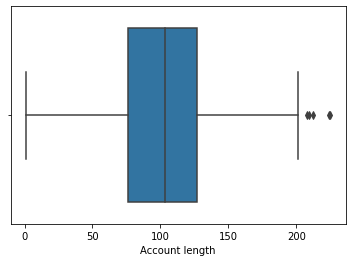

In [12]:
sns.boxplot(df[df['Churn']==True]['Account length'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


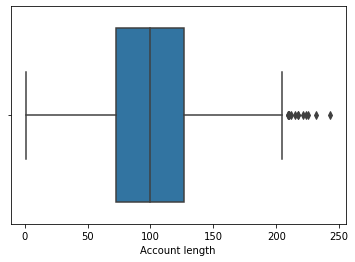

In [13]:
sns.boxplot(df[df['Churn']==False]['Account length'])

In [14]:
df[df['Churn']==False]['Number vmail messages']

0       25
1       26
2        0
3        0
4        0
        ..
3328    36
3329     0
3330     0
3331     0
3332    25
Name: Number vmail messages, Length: 2850, dtype: int64

In [15]:
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [16]:
df[df['Churn']==True].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


In [17]:
df['state+area']=df.apply(lambda x: x['State']+str(x['Area code']),axis=1)

In [18]:
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state+area
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False,KS415


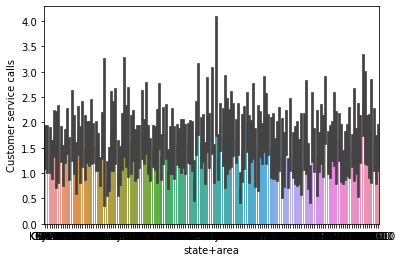

In [19]:
sns.barplot(x=df['state+area'],y=df['Customer service calls'])

In [20]:
df['Effective Charges Per Min'] = df.apply(lambda x: (x['Total day charge']+x['Total eve charge']+x['Total night charge']+x['Total intl charge'])/(x['Total day minutes']+x['Total eve minutes']+x['Total night minutes']+x['Total intl minutes']),axis=1)

In [21]:
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state+area,Effective Charges Per Min
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False,KS415,0.105354


In [22]:
true_df = df[df['Churn']==True]

In [23]:
false_df = df[df['Churn']==False]

In [24]:
true_df.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state+area,Effective Charges Per Min
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,IN415,0.093594
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,NY415,0.113004


In [25]:
false_df.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state+area,Effective Charges Per Min
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False,KS415,0.105354
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False,OH415,0.094754


In [26]:
false_df.groupby('State')['State'].count().sort_values(ascending = False).head(2)

State
WV    96
AL    72
Name: State, dtype: int64

In [27]:
true_df.groupby('State')['State'].count().sort_values(ascending = True).head(2)

State
AK    3
IA    3
Name: State, dtype: int64

In [28]:
len(true_df[(true_df['International plan']=='No')&(true_df['Voice mail plan']=='No')])

302

In [29]:
len(true_df[(true_df['International plan']=='Yes')&(true_df['Voice mail plan']=='No')])

101

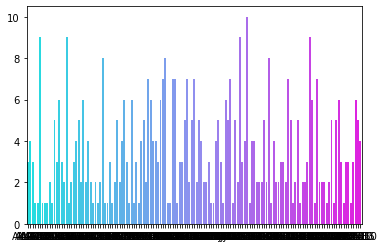

In [30]:
state,count = np.unique(true_df["state+area"],return_counts=True)
sns.barplot(x=state,y=count, palette = 'cool')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


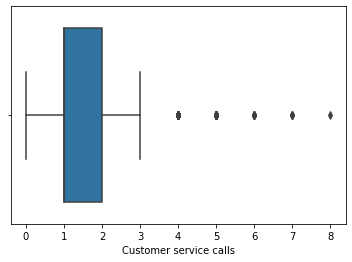

In [31]:
sns.boxplot(false_df['Customer service calls'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


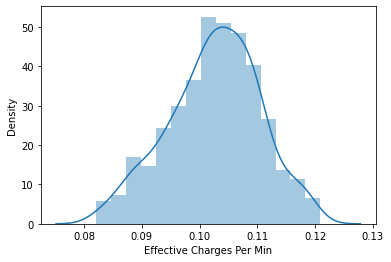

In [32]:
sns.distplot(true_df[(true_df['Effective Charges Per Min']>0.082)&(true_df['Effective Charges Per Min']<0.122)]['Effective Charges Per Min'],hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


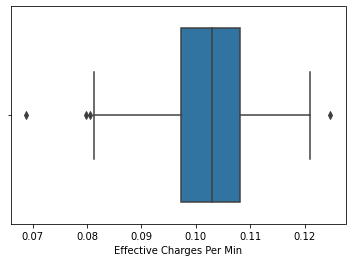

In [33]:
sns.boxplot(true_df['Effective Charges Per Min'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


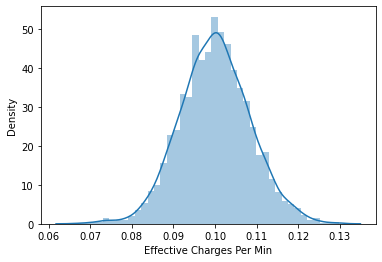

In [34]:
sns.distplot(false_df['Effective Charges Per Min'],hist=True)

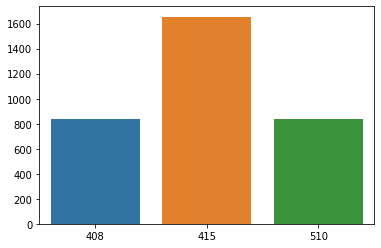

In [35]:
arc,count= np.unique(df['Area code'],return_counts=True)
sns.barplot(x=arc, y= count)

In [36]:
new_df=false_df[['International plan','Voice mail plan','Churn']]

In [37]:
new_df.head()

,International plan,Voice mail plan,Churn
0,No,Yes,False
1,No,Yes,False
2,No,No,False
3,Yes,No,False
4,Yes,No,False


In [38]:
def func(value):
  if value== 'Yes':
    return 1
  return 0

In [39]:
df['International plan']=df['International plan'].apply(func)

In [40]:
new_df['Voice mail plan']=new_df['Voice mail plan'].apply(func)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
def func1(value):
  if value:
    return 1
  return 0 

In [42]:
new_df['Churn']=new_df['Churn'].apply(func1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
new_df.head()

,International plan,Voice mail plan,Churn
0,No,1,0
1,No,1,0
2,No,0,0
3,Yes,0,0
4,Yes,0,0


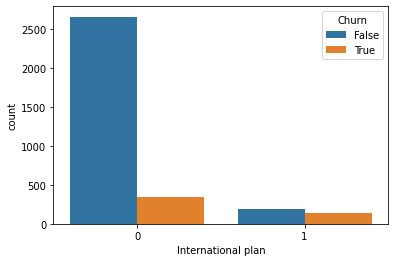

In [44]:
sns.countplot(x=df['International plan'],hue=df['Churn'])

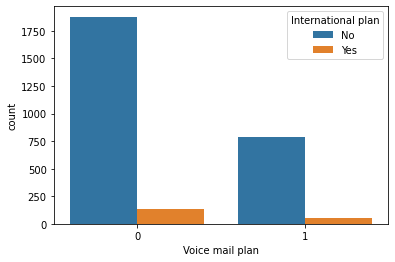

In [45]:
sns.countplot(x=new_df['Voice mail plan'],hue=new_df['International plan'])

In [46]:
pd.crosstab(df['Number vmail messages'],df['Churn'])

Churn,False,True
Number vmail messages,,
0,2008,403
4,1,0
8,2,0
9,2,0
10,1,0
11,2,0
12,6,0
13,4,0
14,7,0


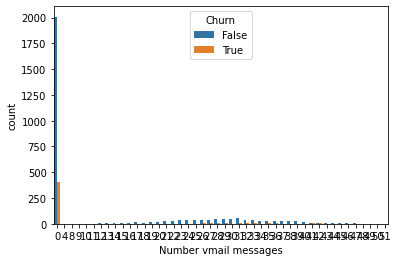

In [47]:
sns.countplot(x=df['Number vmail messages'],hue=df['Churn'])

In [48]:
type(pd.crosstab(df['Number vmail messages'],df['Churn']))

pandas.core.frame.DataFrame

In [49]:
cccc=pd.crosstab(df['Customer service calls'],df['Churn'])

In [50]:
cccc

Churn,False,True
Customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


In [51]:
df['Churn']=df['Churn'].apply(func1)

In [52]:
cccc=pd.crosstab(df['Customer service calls'],df['Churn'])

In [53]:
cccc['churn_rate']=cccc.apply(lambda x: x[1]*100/(x[1]+x[0]),axis=1)

In [54]:
cccc

Churn,0,1,churn_rate
Customer service calls,,,
0,605,92,13.199426
1,1059,122,10.330229
2,672,87,11.462451
3,385,44,10.256410
4,90,76,45.783133
5,26,40,60.606061
6,8,14,63.636364
7,4,5,55.555556
8,1,1,50.000000


In [55]:
def func2(x):
  if x>3:
    return 1
  return 0 

In [56]:
df['Bad service']=df['Customer service calls'].apply(func2)

In [57]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state+area,Effective Charges Per Min,Bad service
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,KS415,0.105354,0
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,OH415,0.094754,0
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,NJ415,0.115480,0
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,OH408,0.118272,0
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,OK415,0.101738,0


In [58]:
df['bs']=df.apply(lambda x: x['International plan']+x['Bad service'],axis=1)

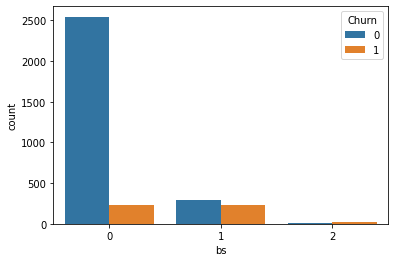

In [59]:
sns.countplot(x=df['bs'],hue=df['Churn'])

If bs=0: Customer doesnt have an international plan and bad service hence they tend to stay

if bs=1: they either have a bad service or international plan hence there is a higher chance of churn

if bs=2: The customer has both bad service and international plan hence almost all of them leave the service.





In [60]:
State_data = pd.crosstab(df["State"],df["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)

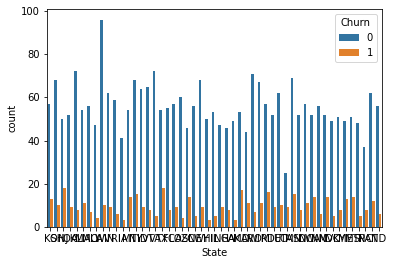

In [61]:
sns.countplot(x='State',hue="Churn",data = df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


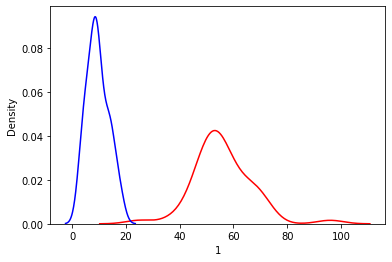

In [62]:
sns.distplot(State_data[0],color='red',hist=False)
sns.distplot(State_data[1],color='blue',hist=False)

In [63]:
State_data

Churn,0,1,Percentage_Churn
State,,,
AK,49,3,5.769231
AL,72,8,10.000000
AR,44,11,20.000000
AZ,60,4,6.250000
CA,25,9,26.470588
CO,57,9,13.636364
CT,62,12,16.216216
DC,49,5,9.259259
DE,52,9,14.754098


In [66]:
df['State_Arcode'] = df.apply(lambda x : x['State']+ str(x['Area code']),axis = 1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'KS415'),
 Text(0, 0, 'OH415'),
 Text(0, 0, 'NJ415'),
 Text(0, 0, 'OH408'),
 Text(0, 0, 'OK415'),
 Text(0, 0, 'AL510'),
 Text(0, 0, 'MA510'),
 Text(0, 0, 'MO415'),
 Text(0, 0, 'LA408'),
 Text(0, 0, 'WV415'),
 Text(0, 0, 'IN415'),
 Text(0, 0, 'RI415'),
 Text(0, 0, 'IA408'),
 Text(0, 0, 'MT510'),
 Text(0, 0, 'IA415'),
 Text(0, 0, 'NY415'),
 Text(0, 0, 'ID408'),
 Text(0, 0, 'VT510'),
 Text(0, 0, 'VA510'),
 Text(0, 0, 'TX415'),
 Text(0, 0, 'FL415'),
 Text(0, 0, 'CO408'),
 Text(0, 0, 'AZ415'),
 Text(0, 0, 'SC415'),
 Text(0, 0, 'NE415'),
 Text(0, 0, 'WY408'),
 Text(0, 0, 'MT408'),
 Text(0, 0, 'HI510'),
 Text(0, 0, 'IL415'),
 Text(0, 0, 'NH510'),
 Text(0, 0, 'AZ408'),
 Text(0, 0, 'OK408'),
 Text(0, 0, 'GA415'),
 Text(0, 0, 'AK408'),
 Text(0, 0, 'MA415'),
 Text(0, 0, 'AK415'),
 Text(0, 0, 'NJ408'),
 Text(0, 0, 'GA408'),
 Text(0, 0, 'MD408'),
 Text(0, 0, 'AR510'),
 Text(0, 0, 'ID415'),
 Text(0, 0, 'WI510'),
 Text(0, 0, 'OR408'),
 Text(0, 0, 'MI415'),
 Text(0, 0, 'DE408'),
 Text(0, 0

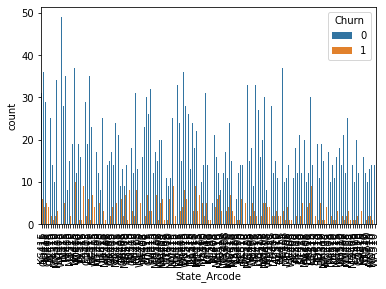

In [67]:
g=sns.countplot(df['State_Arcode'],hue = df['Churn'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [68]:
State_Arcode_data = pd.crosstab(df['State_Arcode'],df["Churn"])


In [69]:
State_Arcode_data['Percentage_Churn'] = State_Arcode_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)

In [70]:
State_Arcode_data[State_Arcode_data['Percentage_Churn']>=40]

Churn,0,1,Percentage_Churn
State_Arcode,,,
MD408,9,7,43.750000
MI408,5,7,58.333333
NJ408,9,6,40.000000
TX510,9,6,40.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of Percentage of people who left to that of the combination of State+Area code')]

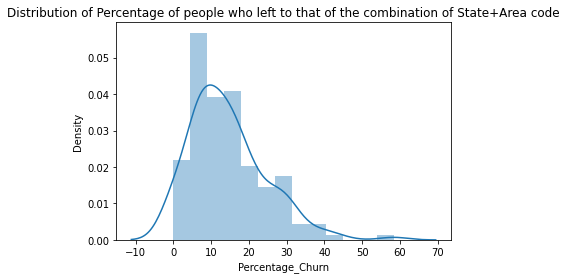

In [71]:
sns.distplot(State_Arcode_data['Percentage_Churn']).set(title='Distribution of Percentage of people who left to that of the combination of State+Area code')
